In [184]:
import pandas as pd
import hashlib

# Load the original CSV file
csv_file_path = r"C:\Professional\MS\SHU\Dissertation\Input_data\restaurants.csv"

input_data_df = pd.read_csv(csv_file_path,encoding ='utf-8')


In [185]:
# input_data_df

In [186]:
df_req = input_data_df[['name','score','ratings','category','price_range','zip_code']]

In [187]:
df_req['price_range'] = df_req['price_range'].apply(lambda x: 1 if x == '$' else (2 if x == '$$' else (3 if x == '$$$' else (4 if x == '$$$$' else 99))))


C:\Users\nikhi\AppData\Local\Temp\ipykernel_24524\2184654435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req['price_range'] = df_req['price_range'].apply(lambda x: 1 if x == '$' else (2 if x == '$$' else (3 if x == '$$$' else (4 if x == '$$$$' else 99))))


In [188]:

# Split the category column into separate elements
df_req['category'] = df_req['category'].str.split(', ')
df_req =df_req.explode('category')


C:\Users\nikhi\AppData\Local\Temp\ipykernel_24524\4115038454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req['category'] = df_req['category'].str.split(', ')


In [189]:
len(df_req['category'].unique())

356

In [190]:

# Create a dictionary mapping major cuisines to categories
cuisine_to_category = {
    'Burgers': 'American',
    'American': 'American',
    'Sandwiches': 'Sandwiches',
    'Coffee and Tea': 'Coffee and Tea',
    'Breakfast and Brunch': 'Breakfast and Brunch',
    'Bubble Tea': 'Coffee and Tea',
    'Cheesesteak': 'American',
    'Alcohol': 'Other',
    'Pizza': 'Italian',
    'Seafood': 'Seafood',
    'Sushi': 'Asian',
    'Steak': 'American',
    'Asian': 'Asian',
    'Japanese': 'Asian',
    'Vegetarian': 'Vegetarian',
    'Asian Fusion': 'Asian',
    'Chinese': 'Asian',
    'Indian': 'Indian',
    'Healthy': 'Other',
    'Fast Food': 'American',
    'Fish and Chips': 'Seafood',
    'Desserts': 'Desserts',
    'Ice Cream + Frozen Yogurt': 'Desserts',
    'Ice Cream & Frozen Yogurt': 'Desserts',
    'Comfort Food': 'American',
    'Diner': 'American',
    'Chicken': 'Other',
    'salad': 'Salads',
    'Sandwich': 'Sandwiches',
    'Family Meals': 'American',
    'Pakistani': 'Indian',
    'Indian Curry': 'Indian',
    'Halal': 'Middle Eastern',
    'Wings': 'American',
    'Middle Eastern': 'Middle Eastern',
    'Mediterranean': 'Mediterranean',
    'Greek': 'Mediterranean',
    'Juice and Smoothies': 'Juice and Smoothies',
    'Fruit': 'Other',
    'Caribbean': 'Latin American',
    'Cuban': 'Latin American',
    'Drinks': 'Other',
    'Bakery': 'Bakery',
    'Italian': 'Italian',
    'Exclusive to Eats': 'Other',
    'Mexican': 'Mexican',
    'Burritos': 'Mexican',
    'BBQ': 'American',
    'Black-owned': 'American',
    'Salads': 'Salads',
    'Hot Dog': 'American',
    'Cafe': 'Coffee and Tea',
    'Coffee & Tea': 'Coffee and Tea',
    'Bowls': 'Asian',
    'Vegan': 'Vegetarian',
    'pizza': 'Italian',
    'Deli': 'Sandwiches',
    'Pasta': 'Italian',
    'Soup': 'Asian',
    'Noodles': 'Asian',
    'French': 'French',
    'Cantonese': 'Asian',
    'Tacos': 'Mexican',
    'Southern': 'American',
    'Soul Food': 'American',
    'New American': 'American',
    'Latin American': 'Latin American',
    'New Mexican': 'Mexican',
    'Fried Chicken': 'American',
    'Breakfast & Brunch': 'Breakfast and Brunch',
    'Donuts': 'Desserts',
    'Spanish': 'European',
    'Bar Food': 'Other',
    'Chicken Strips': 'American',
    'Dinner': 'American',
    'burger': 'American',
    'wings': 'American',
    'Japanese sweets': 'Asian',
    'Vegetarian Friendly': 'Vegetarian',
    'Kids Friendly': 'Other',
    'Family Friendly': 'Other',
    'Group Friendly': 'Other',
    'Asian Cuisine': 'Asian',
    'Thai': 'Asian',
    'Allergy Friendly': 'Other',
    'Cajun': 'Other',
    'Gluten Free': 'Other',
    'Rolls': 'Asian',
    'pasta': 'Italian',
    'Traditional American': 'American',
    'Pharmacy': 'Other',
    'Convenience': 'Other',
    'Everyday Essentials': 'Other',
    'Baby': 'Other',
    'Dessert: Other': 'Desserts',
    'Turkish': 'Middle Eastern',
    'PIzza': 'Italian',
    'Pastry': 'Bakery',
    'Tex Mex': 'Mexican',
    'Wine': 'Other',
    'Omelette': 'Breakfast and Brunch',
    'Retail': 'Other',
    'Gift Store': 'Other',
    'Beauty Supply': 'Other',
    'Barfood': 'Other',
    'Snacks': 'Other',
    'Creole': 'Other',
    'Pretzel': 'Other',
    'Fish & Seafood': 'Seafood',
    'Ramen': 'Asian',
    'Juice': 'Juice and Smoothies',
    'Korean': 'Asian',
    'European': 'European',
    'Plant Based': 'Vegetarian',
    'Brazilian': 'Latin American',
    'Dominican': 'Latin American',
    'Flour based food': 'Bakery',
    'Candy': 'Desserts',
    'Sanwiches': 'Sandwiches',
    'Cupcakes': 'Desserts',
    'Vietnamese': 'Asian',
    'Dount': 'Desserts',
    'Juice & Smoothies': 'Juice and Smoothies',
    'Rice-bowls': 'Asian',
    'Bagels': 'Bakery',
    'Poke': 'Asian',
    'Aus Burger': 'Australian',
    'chocolatier': 'Desserts',
    'Cajun / Creole': 'Other',
    'Grocery': 'Other',
    'Juice Bars': 'Juice and Smoothies',
    'Flowers': 'Other',
    'florist': 'Other',
    'Gifts': 'Other',
    'Plants': 'Other',
    'Home & Personal Care': 'Other',
    'Modern European': 'European',
    'German': 'European',
    'African': 'African',
    'Jamaican': 'Latin American',
    'Egyptian': 'Middle Eastern',
    'Asian-owned': 'Asian',
    'Stir Fried': 'Asian',
    'Teppanyaki': 'Asian',
    'Rice & Curry': 'Indian',
    'Canadian': 'Canadian',
    'Pub': 'Other',
    'Polish': 'European',
    'Rice Dishes': 'Asian',
    'Fried Foods': 'American',
    'Women-owned': 'Other',
    'Arabian': 'Middle Eastern',
    'Malaysian': 'Asian',
    'Vegan Friendly': 'Vegetarian',
    'African: Other': 'African',
    'Mac and Cheese': 'American',
    'Irish': 'European',
    'Specialty Foods': 'Other',
    'AAPI-owned': 'Asian',
    'Chinese: Other': 'Asian',
    'Syrian': 'Middle Eastern',
    'Pho': 'Asian',
    'Momos': 'Indian',
    'Nepalese': 'Indian',
    'Kosher': 'Other',
    'Jewish': 'Other',
    'Hawaiian': 'Latin American',
    'Affordable Meals': 'American',
    'Tempura': 'Asian',
    'Ethiopian': 'African',
    'Crepe': 'French',
    'Japanese set items': 'Asian',
    'Tamale': 'Latin American',
    'Other': 'Other',
    'Latin Fusion': 'Latin American',
    'Gluten Free Friendly': 'Other',
    'Falafel': 'Middle Eastern',
    'Bar / Pub Food': 'Other',
    'Cheese': 'Other',
    'South American': 'Latin American',
    'Salad/Sandwiches': 'Salads',
    'Ice Cream': 'Desserts',
    'Taiwanese': 'Asian',
    'Local Specialities': 'Other',
    'Venezuelan': 'Latin American',
    'Colombian': 'Latin American',
    'Salad / Sandwiches': 'Salads',
    'Gourmet': 'Other',
    'Biryani': 'Indian',
    'Japanese: Sushi': 'Asian',
    'Russian': 'European',
    'Breakfast': 'Breakfast and Brunch',
    'Brunch': 'Breakfast and Brunch',
    'Japanese Style curry': 'Asian',
    'Northeastern Thai': 'Asian',
    'Tea & Coffee': 'Coffee and Tea',
    'Dim Sum': 'Asian',
    'To Share': 'Other',
    'Peruvian': 'Latin American',
    'Tapas': 'Mexican',
    'Southern Thai': 'Asian',
    'Cakes': 'Desserts',
    'Wraps': 'Sandwiches',
    'Western': 'Other',
    'Liquor Stores': 'Other',
    'OrganicProducts': 'Other',
    'Chinese: Cantonese': 'Asian',
    'Keto': 'Other',
    'Hungarian': 'European',
    'Vegetarian-Friendly': 'Vegetarian',
    'Asian: Other': 'Asian',
    'South East Asian': 'Asian',
    'Gluten-Free Friendly': 'Other',
    'Mongolian': 'Asian',
    'Afghan': 'Middle Eastern',
    'Japanese BBQ': 'Asian',
    'Street Food': 'Other',
    'Lebanese': 'Middle Eastern',
    'Chinese: Sichuan': 'Asian',
    'Braised Dishes': 'Asian',
    'Braised Pork Rice': 'Asian',
    'Szechuan': 'Asian',
    'Burmese': 'Asian',
    'Japanese Skewer food': 'Asian',
    'Japanese: Other': 'Asian',
    'North Indian': 'Indian',
    'Yakitori': 'Asian',
    'Empanada': 'Latin American',
    'Hot Pot': 'Asian',
    'Portuguese': 'European',
    'Persian': 'Middle Eastern',
    'MarketingCampaign': 'Other',
    'whatever': 'Other',
    'Chinese: Noodles & Dumplings': 'Asian',
    'Chinese Food': 'Asian',
    'Tibetan': 'Asian',
    'South African': 'African',
    'Indonesian': 'Asian',
    'Açaí': 'Other',
    'Beer': 'Other',
    'Kebab': 'Middle Eastern',
    'Chinese: Taiwanese': 'Asian',
    'Specialty': 'Other',
    'Scandinavian': 'European',
    'Tom Yum': 'Asian',
    'Iranian': 'Middle Eastern',
    'Spicy Hot Pot': 'Asian',
    'Dumpling House': 'Asian',
    'Paleo': 'Other',
    'South Indian': 'Indian',
    'BOGO': 'Other',
    'Bistro': 'European',
    'Laotian': 'Asian',
    'Modern French': 'French',
    'Home & Decor': 'Other',
    'Japanese: Ramen': 'Asian',
    'Northern Thai': 'Asian',
    'Carnicería': 'Mexican',
    'Australian': 'Australian',
    'Filipino': 'Asian',
    'Dumplings': 'Asian',
    'South Asian': 'Asian',
    'Latin American: Other': 'Latin American',
    'Himalayan': 'Asian',
    'Convenience Store with Alcohol': 'Other',
    'Smoke Shop': 'Other',
    'Quesadillas': 'Mexican',
    'Modern Australian': 'Australian',
    'Bento': 'Asian',
    'Beef Noodles': 'Asian',
    'Singaporean': 'Asian',
    'Salvadorian': 'Latin American',
    'Poutine': 'Canadian',
    'Eastern European': 'European',
    'Non Halal': 'Other',
    'Moroccan': 'African',
    'Yucatecan': 'Latin American',
    'Cambodian': 'Asian',
    'Swedish': 'European',
    'Argentinian': 'Latin American',
    'Vegan-Friendly': 'Vegetarian',
    'Other Asian': 'Asian',
    'Adult': 'Other',
    'Western-style Japanese Food': 'Asian',
    'Congee': 'Asian',
    'Sichuan': 'Asian',
    'Indoor Plants & Gifts': 'Other',
    'bookstore': 'Other',
    'West Indian': 'Latin American',
    'ButcherShop': 'Other',
    'Arepa': 'Latin American',
    'Georgian': 'European',
    'Sandwhiches': 'Sandwiches',
    'OtherAsian': 'Asian',
    'Okonomiyaki': 'Asian',
    'Pure Veg': 'Vegetarian',
    'Dosa': 'Indian',
    'Pet Shop': 'Other',
    'Pet Supplies': 'Other',
    'pet supplies': 'Other',
    'Otsumami': 'Asian',
    'British': 'European',
    'Scottish': 'European',
    'American (New)': 'American',
    'Bacon': 'Other',
    'Eggs': 'Breakfast and Brunch',
    'Rotti': 'Indian',
    'Chinese: Hot Pot': 'Asian',
    'West African': 'African',
    'Armenian': 'European',
    'Neapolitan': 'Italian',
    'Bangladeshi': 'Indian',
    'Congee Boil Rice': 'Asian',
    'Gyro': 'Mediterranean',
    'African: Ethiopian': 'African',
    'Vegetarian / Vegan': 'Vegetarian',
    'Belgian': 'European',
    'Premium': 'Other',
    'Personal Care': 'Other',
    'Asado': 'Latin American',
    'Health & Nutrition Supplements': 'Other',
    'Puerto Rican': 'Latin American',
    'Traditional': 'Other',
    'JuiceAndSmoothie': 'Juice and Smoothies',
    'Juice Bars & Smoothies': 'Juice and Smoothies',
    'Sushi Bar': 'Asian',
    'American (Traditional)': 'American',
    'Sports Bar': 'Other',
    'Thali': 'Indian',
    'Bolivian': 'Latin American',
    'Ameican': 'American',
    'European: Other': 'European',
    'Haitian': 'Latin American',
    'Regalos y flores': 'Other',
    'Nigerian': 'African',
    'Balkan': 'European',
    'Chilean': 'Latin American',
    'Som Tum': 'Asian',
    'Crepe or Creperie': 'French',
    'Steakhouse': 'American',
    'Farmacia': 'Other',
    'Mercado Express': 'Other',
    'Especialidades': 'Other',
    'Snack': 'Other',
    'Frozen Yogurt': 'Desserts',
    'Smoothies': 'Juice and Smoothies',
    'Ice cream': 'Desserts',
    'Sandwiches/ Salads': 'Salads',
    'Czech': 'European',
    'Friterie': 'American',
    'Frozen Food': 'Other',
    'Sopas e Caldos': 'Asian',
    'Local Eats': 'Other',
    'FriedRice': 'Asian',
    'Assorted Stores': 'Other'
}

# Map the cuisines to categories based on the dictionary
df_req['category_1'] = df_req['category'].map(cuisine_to_category)
# Replace NaN values with 'Other'
df_req['category_1'] = df_req['category_1'].fillna('Other')



In [191]:
df_req[df_req['category_1']=='Other']

,name,score,ratings,category,price_range,zip_code,category_1
2,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,Alcohol,1,35204,Other
7,Little India,NaN,NaN,Healthy,1,35205,Other
11,The Ice Cream Shop,NaN,NaN,Ice Cream &amp; Frozen Yogurt,1,35222,Other
12,Bunrise Burgers,NaN,NaN,Chicken,99,35214,Other
13,Panera (521 Fieldstown Road),4.6,44.0,Healthy,1,35071,Other
...,...,...,...,...,...,...,...
40225,Austin's Habibi (5th St),4.7,208.0,Gluten Free Friendly,2,78703,Other
40225,Austin's Habibi (5th St),4.7,208.0,Allergy Friendly,2,78703,Other
40225,Austin's Habibi (5th St),4.7,208.0,Local Specialities,2,78703,Other
40226,Beijing Wok,4.4,254.0,Family Friendly,1,78749,Other


In [192]:
df_req = df_req[df_req['category_1'] != 'Other']

In [195]:
(df_req['category_1'].unique())

array(['American', 'Sandwiches', 'Coffee and Tea', 'Breakfast and Brunch',
       'Italian', 'Seafood', 'Asian', 'Vegetarian', 'Indian', 'Desserts',
       'Salads', 'Middle Eastern', 'Mediterranean', 'Juice and Smoothies',
       'Latin American', 'Bakery', 'Mexican', 'French', 'European',
       'Australian', 'African', 'Canadian'], dtype=object)

In [196]:
# Get unique categories
unique_categories = len(df_req['category_1'].unique())
unique_categories1 = df_req['category_1'].unique()
print("Unique Categories:", unique_categories)

Unique Categories: 22


In [203]:

# Extract substring before hyphen for valid zip codes
df_req['zip_code'] = df_req['zip_code'].apply(lambda x: x.split('-')[0] if '-' in x else x)



In [204]:
import re
# Fill null values with random value
df_req['zip_code'].fillna('11111', inplace=True)
# Define a function to check if a zip code is valid
def is_valid_zip(zip_code):
    return bool(re.match(r'^\d{5}(-\d{4})?$', str(zip_code)))

if invalid_zip_mask.any():
    print("Invalid zip codes exist:")
    print(df_req[invalid_zip_mask]['zip_code'])
else:
    print("No invalid zip")

No invalid zip


In [202]:
# Remove all invalid zipcodes which were re-labelled 11111
df_req = df_req[df_req['zip_code'] != '11111']
df_req

,name,score,ratings,category,price_range,zip_code,category_1
0,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,Burgers,1,35207,American
0,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,American,1,35207,American
0,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,Sandwiches,1,35207,Sandwiches
1,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,Coffee and Tea,99,35217,Coffee and Tea
1,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,Breakfast and Brunch,99,35217,Breakfast and Brunch
...,...,...,...,...,...,...,...
40225,Austin's Habibi (5th St),4.7,208.0,Vegan Friendly,2,78703,Vegetarian
40225,Austin's Habibi (5th St),4.7,208.0,Vegetarian Friendly,2,78703,Vegetarian
40226,Beijing Wok,4.4,254.0,Chinese,1,78749,Asian
40226,Beijing Wok,4.4,254.0,Asian,1,78749,Asian


In [156]:
category_frequency = df_req.groupby(['zip_code', 'category']).size().reset_index(name='count')
# Sort the DataFrame in descending order based on 'count'
category_frequency_sorted = category_frequency.sort_values(by=['count'], ascending=[False])
category_frequency_sorted

,zip_code,category,count
5913,22314,American,81
32873,98052,American,70
4958,22192,American,69
1478,20109,American,64
25634,78666,American,64
...,...,...,...
22365,76108,Ice Cream + Frozen Yogurt,1
22364,76108,Greek,1
22363,76108,Fried Chicken,1
22360,76108,Donuts,1


In [157]:
# Fill NaN values in 'score' and 'ratings' columns with the mean value
mean_score = df_req['score'].mean()
mean_ratings = df_req['ratings'].mean()
df_req['score'].fillna(mean_score, inplace=True)
df_req['ratings'].fillna(mean_ratings, inplace=True)

# Calculate the weighted average rating
df_req['weighted_rating'] = df_req['score'] * df_req['ratings']

# Group by zipcode and category and calculate the sum of weighted ratings and total ratings
grouped = df_req.groupby(['zip_code', 'category_1']).agg({'weighted_rating': 'sum', 'ratings': 'sum'}).reset_index()

# Calculate the weighted average rating
grouped['weighted_average_rating'] = grouped['weighted_rating'] / grouped['ratings']

# Display the new dataset
grouped


,zip_code,category_1,weighted_rating,ratings,weighted_average_rating
0,00646,American,5015.819839,1099.708608,4.561044
1,00646,European,57.600000,12.000000,4.800000
2,00646,Italian,460.600000,98.000000,4.700000
3,00646,Mediterranean,57.600000,12.000000,4.800000
4,00646,Salads,1192.500000,265.000000,4.500000
...,...,...,...,...,...
14843,99403,Asian,1059.659517,233.125823,4.545440
14844,99403,Coffee and Tea,353.219839,77.708608,4.545440
14845,99403,Desserts,1059.659517,233.125823,4.545440
14846,99403,Italian,353.219839,77.708608,4.545440


In [158]:
# Find the highest average rating
highest_avg = grouped['weighted_average_rating'].idxmax()
highest_category = grouped.loc[highest_avg, 'category_1']
highest_zip = grouped.loc[highest_avg, 'zip_code']
highest_rating = grouped.loc[highest_avg, 'weighted_average_rating']

# Find the least average rating
least_avg = grouped['weighted_average_rating'].idxmin()
least_category = grouped.loc[least_avg, 'category_1']
least_zip = grouped.loc[least_avg, 'zip_code']
least_rating = grouped.loc[least_avg, 'weighted_average_rating']

print("Highest Average Rating:")
print("Category:", highest_category)
print("Zip Code:", highest_zip)
print("Weighted Average Rating:", highest_rating)

print("\nLeast Average Rating:")
print("Category:", least_category)
print("Zip Code:", least_zip)
print("Weighted Average Rating:", least_rating)


Highest Average Rating:
Category: Italian
Zip Code: 20018
Weighted Average Rating: 5.0

Least Average Rating:
Category: Asian
Zip Code: 75039
Weighted Average Rating: 2.6


In [159]:
# Filter the dataset for the "Indian" category
indian_data = grouped[grouped['category_1'] == 'Indian']

# Calculate the weighted average rating for Indian category
indian_weighted_avg = indian_data['weighted_average_rating'].values[0]

print("Weighted Average Rating for Indian Category:", indian_weighted_avg)


Weighted Average Rating for Indian Category: 4.649473362025127


In [162]:
final =grouped[['zip_code','category_1','weighted_average_rating']]

final.to_csv(r"C:\professional\ms\shu\dissertation\Output_data\restaurant_grouped.csv",index =False)

In [163]:
final

,zip_code,category_1,weighted_average_rating
0,00646,American,4.561044
1,00646,European,4.800000
2,00646,Italian,4.700000
3,00646,Mediterranean,4.800000
4,00646,Salads,4.500000
...,...,...,...
14843,99403,Asian,4.545440
14844,99403,Coffee and Tea,4.545440
14845,99403,Desserts,4.545440
14846,99403,Italian,4.545440


In [164]:
grouped[grouped['category_1']=='Other']

,zip_code,category_1,weighted_rating,ratings,weighted_average_rating


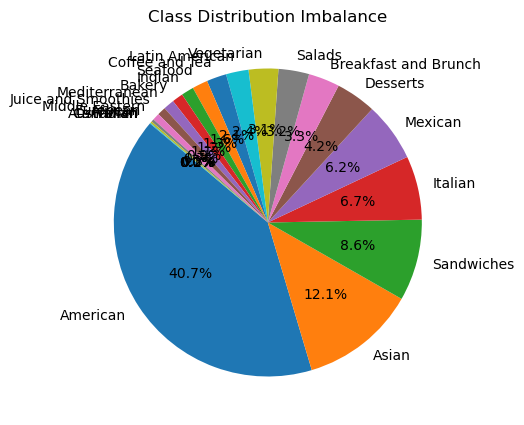

In [165]:
import matplotlib.pyplot as plt

# Assuming 'y' is your target variable
class_counts = df_req['category_1'].value_counts()


plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution Imbalance')
plt.show()

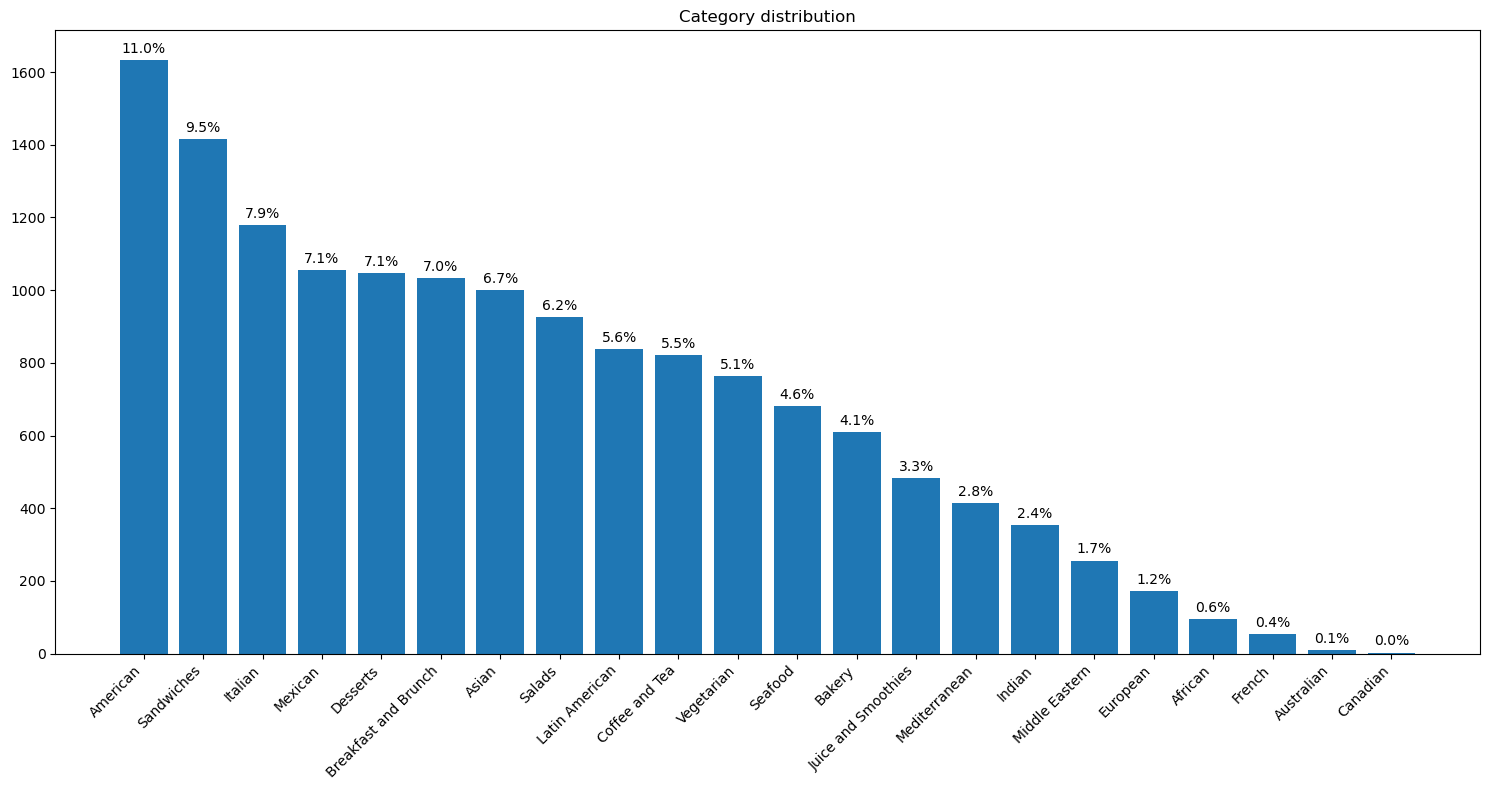

In [166]:
import matplotlib.pyplot as plt
import pandas as pd

class_counts = grouped['category_1'].value_counts()
percentages = (class_counts / class_counts.sum()) * 100

plt.figure(figsize=(15, 8))

# Create a bar plot
bars = plt.bar(class_counts.index, class_counts.values)

# Add percentage values on top of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.annotate(f'{percentage:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.title('Category distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


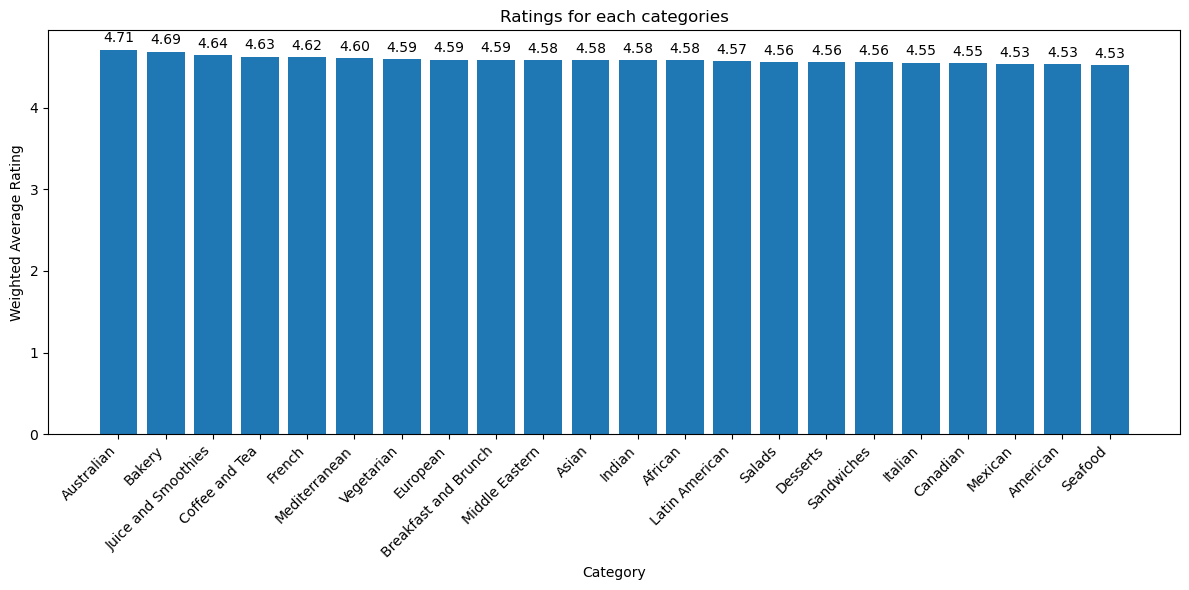

In [177]:
# Group by category and calculate the mean rating for each category
category_ratings = grouped.groupby('category_1')['weighted_average_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

# Create a bar plot for the aggregated ratings by category
bars = plt.bar(category_ratings.index, category_ratings.values)

# Add rating values on top of each bar
for bar, rating in zip(bars, category_ratings.values):
    height = bar.get_height()
    plt.annotate(f'{rating:.2f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.title('Ratings for each categories')
plt.xlabel('Category')
plt.ylabel('Weighted Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



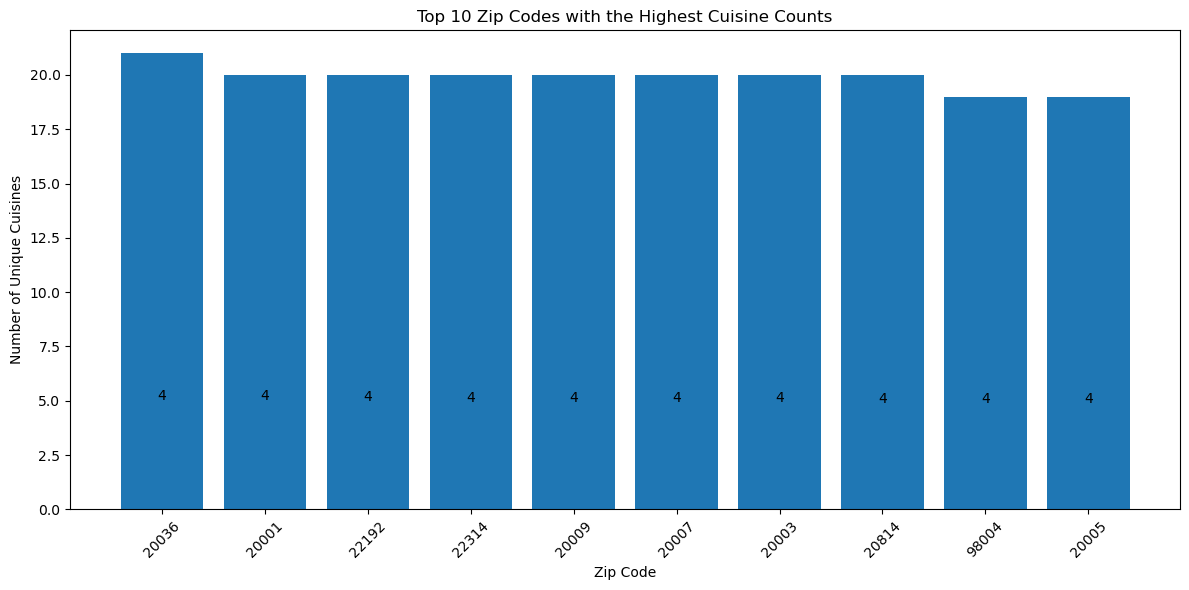

<Figure size 640x480 with 0 Axes>

In [183]:
# Group by zip_code and count unique cuisines
zipcode_cuisine_counts = grouped.groupby('zip_code')['category_1'].nunique().reset_index()
zipcode_cuisine_counts.columns = ['zip_code', 'cuisine_count']

# Sort zip codes by count in descending order and select the top 10
top_10_zipcodes = zipcode_cuisine_counts.sort_values(by='cuisine_count', ascending=False).head(10)

# Plot the top 10 zip codes and their corresponding cuisine counts
plt.figure(figsize=(12, 6))
plt.bar(top_10_zipcodes['zip_code'], top_10_zipcodes['cuisine_count'])
plt.title('Top 10 Zip Codes with the Highest Cuisine Counts')
plt.xlabel('Zip Code')
plt.ylabel('Number of Unique Cuisines')
plt.xticks(rotation=45)
# Add count values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

